# Compression comparsion on Sturmian words

In [22]:
from compression.LZ77 import LZ77Compressor
from SturmGenerator import sturmian

import random
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [10, 5]

## Parameters

In [23]:
n = 10
max_range = 4

seeds = [42,56,95,45,62]

## Generating Sturmian words

In [24]:
sturmian_integers = []
for s in seeds:
    random.seed(s)
    sturmian_integers += [[ random.randint(1, max_range) for i in range(n)]]
    
sturmian_words = [sturmian(integers) for integers in sturmian_integers]

print('[+] Word lenghts:')
for word in sturmian_words:
    print('[-]', len(word))

[+] Word lenghts:
[-] 1983
[-] 23423
[-] 3350
[-] 39481
[-] 9806


## Lempel-Ziv 77 Results

In [25]:
w_sizes = np.arange(7,255, 5, dtype=np.int)
lenghts = np.zeros((len(sturmian_words), w_sizes.size), dtype=np.int)

for i in range(w_sizes.size):
    lz77 = LZ77Compressor(w_size=w_sizes[i])
    
    for j in range(len(sturmian_words)):
        compressed = lz77.compress(sturmian_words[j])
        lenghts[j,i] = len(compressed)
        
lenghts

array([[ 327,  137,  137,  137,   61,   61,   61,   61,   61,   61,   61,
          27,   27,   27,   27,   27,   27,   27,   27,   27,   27,   27,
          27,   27,   27,   27,   27,   27,   19,   19,   19,   19,   19,
          19,   19,   19,   19,   19,   19,   19,   19,   17,   17,   17,
          17,   17,   17,   17,   17,   17],
       [4871, 1511, 1511, 1511, 1511,  349,  349,  349,  349,  349,  349,
         349,  349,  349,  349,  349,  349,  349,  349,  349,  349,  349,
         349,  349,  129,  129,  129,  129,  129,  129,  129,  129,  129,
         129,  129,  129,  129,  129,  129,  129,  129,  129,  129,  129,
         129,  129,  129,  129,  129,  129],
       [ 443,  443,  127,  127,  127,  127,  127,  127,   75,   75,   75,
          59,   59,   59,   59,   59,   59,   59,   59,   59,   23,   23,
          23,   23,   23,   23,   23,   23,   23,   23,   23,   23,   23,
          23,   23,   23,   23,   23,   23,   23,   23,   23,   23,   23,
          23,   23,   

Text(0.5,1,'LZ77 compare')

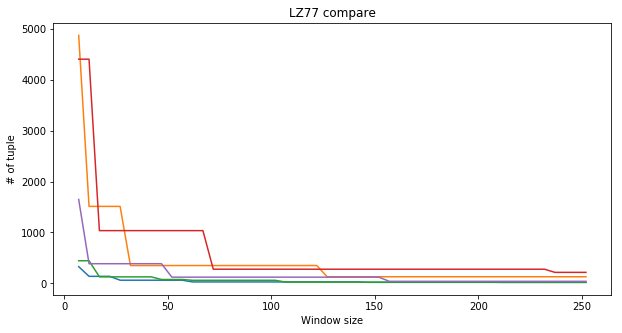

In [28]:
for j in range(len(sturmian_words)):
    plt.plot(w_sizes, lenghts[j,:])

plt.legend()
plt.xlabel('Window size')
plt.ylabel('# of tuple')
plt.title('LZ77 compare')